Concatenate and pandaize data downloaded from CityProtect.
Given a folder, find all the files ending with "Los_Altos_Police_Department_report.csv", concatenate, and sort by date.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import glob

In [4]:
filelist = glob.glob("../data/raw_data/*Los_Altos_Police_Department_report.csv")

In [5]:
df = pd.concat([pd.read_csv(f) for f in filelist], ignore_index=True)

Raw data includes repeats of the column headers scattered in the file. This will throw away those spurious records.

In [6]:
df = df[df.ne(df.columns).any(1)]

Convert the dates from strings to datetime objects

In [7]:
df["date"] = pd.to_datetime(df["date"].str.upper(), format="%m/%d/%Y, %I:%M:%S %p")

In [8]:
df["updateDate"] = pd.to_datetime(df["updateDate"].str.upper(), format="%m/%d/%Y, %I:%M:%S %p")

Clean up the [CAD] and CAD] extra characters

In [9]:
df["incidentType"] = df["incidentType"].replace(regex=r".CAD\]", value="").str.strip()

In [10]:
df["parentIncidentType"] = df["parentIncidentType"].str.strip()

Ignore incomplete data at the end of the dataset

In [43]:
df = df[df["date"] < datetime(year=2023, month=1, day=1)]

In [44]:
incident_types = set([a.strip() for b in df['incidentType'].str.split(';').values for a in b])

In [81]:
len(incident_types)

163

In [45]:
freqs = df['parentIncidentType'].value_counts()

In [46]:
freqs

Other                  41698
Proactive Policing     22147
Quality of Life         9299
Traffic                 6190
Fire                    1570
Theft                   1288
Property Crime           706
Breaking & Entering      529
Theft of Vehicle         293
Assault                  134
Robbery                   26
Name: parentIncidentType, dtype: int64

In [47]:
parentIncident_types = set([a.strip() for b in df['parentIncidentType'].str.split(';').values for a in b])

In [48]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Robbery',
 'Theft',
 'Theft of Vehicle',
 'Traffic'}

In [49]:
monthly = {k: df[df["parentIncidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in parentIncident_types}

In [50]:
monthly_df = pd.DataFrame({k: monthly[k].count()["ccn"] for k in parentIncident_types}).fillna(0)

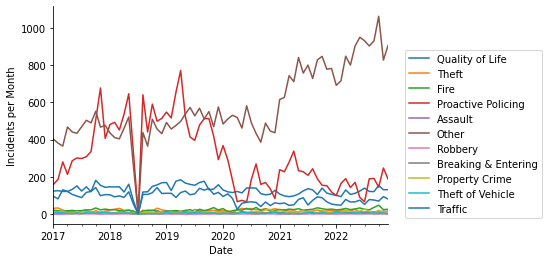

In [77]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#plt.savefig("Stops_over_time.png", bbox_inches="tight")

In [52]:
set(df[df["parentIncidentType"]=="Other"]["incidentType"])

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ALARM',
 'ALARM;RMS: ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ANIMAL;XPTL - EXTRA PATROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ASSAULT WITH A DEADLY WEAPON',
 'ATTEMPT TO CONTACT',
 'AUTO BURGLARY',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMUNITY RELATIONS',
 'CPS',
 'CPS;RMS: ALARM',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE; MENTAL HEALTH ISSUE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLOSION',
 'FINANCIAL CRIME',
 'FINANCIAL CRIME;RMS: DMVL',
 'FIRE',
 'FIRE DEPT ASSIST',
 'FIRE INFORMATION',
 'FIREARM DISCHARGE (HEARD ONLY)',
 'FLAGGED DOWN BY CITIZEN IN FIELD',
 'FOLLOW UP',
 'FOUND',
 'FOUND;FICTITIOU

In [25]:
set(df[df["parentIncidentType"]=="Proactive Policing"]["incidentType"])

{'FOOT PATROL',
 'PED/BIKE STOP',
 'PED/BIKE STOP: SEND FILL',
 'TRAFFIC STOP',
 'TRAFFIC STOP: SEND FILL',
 'TRAFFIC STOP;DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'TRAFFIC STOP;RMS: TRAFFIC OFFENSE'}

In [53]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft"]

In [54]:
violent_list = ["Assault", "Robbery"]

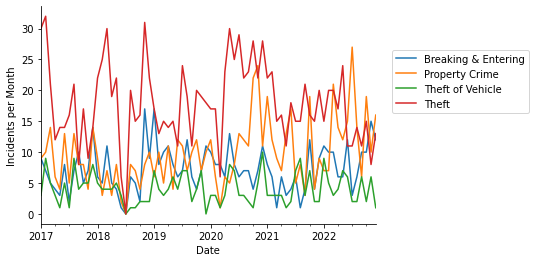

In [56]:
ax = monthly_df[prop_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#.savefig("Stops_over_time.png", bbox_inches="tight")

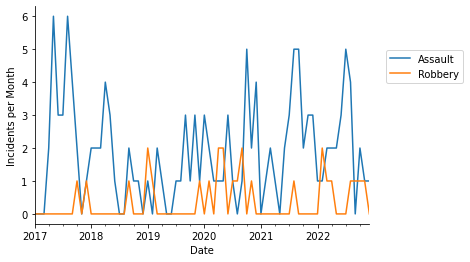

In [57]:
ax = monthly_df[violent_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
#.savefig("Stops_over_time.png", bbox_inches="tight")

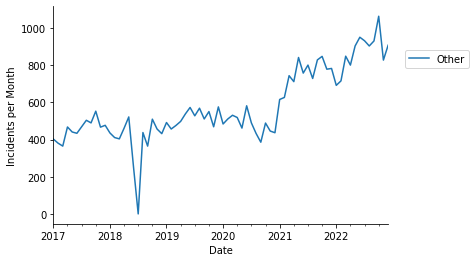

In [58]:
ax = monthly_df["Other"].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [59]:
other_df = df[df["parentIncidentType"]=="Other"]

In [61]:
other_incident_types = set([a.strip() for b in other_df['incidentType'].str.split(';').values for a in b])

In [62]:
other_incident_types

{'911',
 'ABANDONED BICYCLE',
 'ABANDONED VEHICLE',
 'ACCIDENT - NON VEHICULAR',
 'ALARM',
 'ANIMAL',
 'ANIMAL CONTROL',
 'ARSON',
 'ASCERTAIN PROBLEM',
 'ASSAULT WITH A DEADLY WEAPON',
 'ATTEMPT TO CONTACT',
 'AUTO BURGLARY',
 'BATTERY SPOUSE/COHAB',
 'BE ON THE LOOKOUT',
 'BIKE PATROL',
 'BOMB THREAT',
 'BRANDISHING A WPN',
 'BUSN AND PROF CODE VIOL',
 'CALL FOR HELP',
 'CFS TRANSPORT',
 'CHILD ABUSE',
 'CHILD LOCKED IN',
 'CITATION SIGN OFF',
 'CIVIL',
 'COMMUNITY RELATIONS',
 'CPS',
 'CRIMINAL DAMAGE-DEFACE-FELONY',
 'CRIMINAL THREATS',
 'CROWD (GATHERING/CONTROL)',
 'DEAD BODY',
 'DEFRAUDING AN INNKEEPER',
 'DISTURBANCE',
 'DOCUMENT SERVICE',
 'DOMESTIC VIOLENCE',
 'ELDER ABUSE',
 'ESCORT',
 'EVENT CREATED IN ERROR',
 'EXPLOSION',
 'FICTITIOUS/STOLEN/ALTERED/SUSPENDED PLATE',
 'FINANCIAL CRIME',
 'FIRE',
 'FIRE DEPT ASSIST',
 'FIRE INFORMATION',
 'FIREARM DISCHARGE (HEARD ONLY)',
 'FLAGGED DOWN BY CITIZEN IN FIELD',
 'FOLLOW UP',
 'FOUND',
 'GAS',
 'GENERAL EXPLOSION',
 'GENERAL W

In [63]:
other_monthly = {k: other_df[other_df["incidentType"] == k].groupby(pd.Grouper(key="date", freq="M")) for k in other_incident_types}

In [65]:
other_monthly_df = pd.DataFrame({k: other_monthly[k].count()["ccn"] for k in other_incident_types}).fillna(0)

In [74]:
top_other = other_monthly_df.sum().sort_values(ascending=False).index.values[0:6]

In [75]:
top_other

array(['PATROL AREA CHECK', 'ALARM', '911', 'MUNI CODE VIOLATION',
       'MEDICAL EMERGENCY', 'INFO GENERAL'], dtype=object)

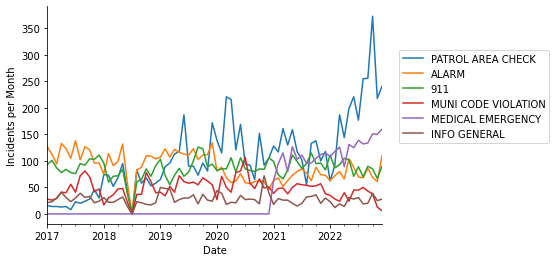

In [76]:
ax = other_monthly_df[top_other].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [28]:
df[df["incidentType"]=="RAPE"]

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative
39213,L220301028,2022-03-01 18:50:42,2022-03-02 14:21:46,LOS ALTOS,CA,94022,200 Block ALMOND AVE,RAPE,Other,Type: RAPE<br />Disposition: N NO REPORT TAKEN
41278,L220104007,2022-01-04 17:27:28,2022-01-05 02:39:20,LOS ALTOS,CA,94022,600 Block TORWOOD LN,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN
77833,L211115012,2021-11-15 20:02:12,2021-11-16 10:11:12,LOS ALTOS,CA,94022,200 Block ALMOND AVE,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN
78508,L211028046,2021-10-29 04:13:42,2021-10-29 18:01:16,LOS ALTOS,CA,94024,900 Block BERRY AVE,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN
83237,L221015032,2022-10-16 03:38:12,2022-10-16 16:19:44,LOS ALTOS,CA,94022,NO ADDRESS DATA,RAPE,Other,Type: RAPE<br />Disposition: R REPORT TAKEN


In [82]:
propolicing_incident_types = set([a.strip() for b in df[df['parentIncidentType']=="Proactive Policing"]["incidentType"].str.split(';').values for a in b])

In [83]:
propolicing_incident_types

{'DUI-IMPAIRED TO SLIGHTEST DEGREE',
 'FOOT PATROL',
 'PED/BIKE STOP',
 'PED/BIKE STOP: SEND FILL',
 'RMS: TRAFFIC OFFENSE',
 'TRAFFIC STOP',
 'TRAFFIC STOP: SEND FILL'}